# KNN Project

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.

----------------------------------


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.


The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

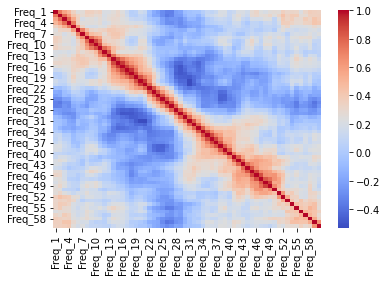

In [5]:
sns.heatmap(df.corr(),cmap='coolwarm');

In [6]:
df['Label'].value_counts()

M    111
R     97
Name: Label, dtype: int64

### Selecting Feature for the Data

In [7]:
X = df.drop('Label',axis=1)

In [8]:
y = df['Label']

### Train | Test  Split 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.10,random_state = 69)

### Checking For best K values 

In [10]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
error = []

for i in range(1,30):
    
    knn = KNeighborsClassifier()
    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    
    knn_model.fit(scaled_X_train,y_train)
    
    y_predict = knn_model.predict(scaled_X_test)
    
    error_ = 1-accuracy_score(y_predict,y_test)
    
    error.append(error_)

Text(0.5, 0, 'K Value')

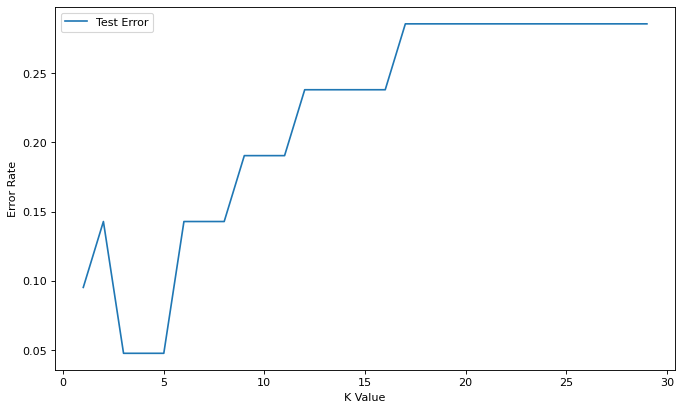

In [12]:
plt.figure(figsize=(10,6),dpi=80)
plt.plot(range(1,30),error,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

(0.0, 7.0)

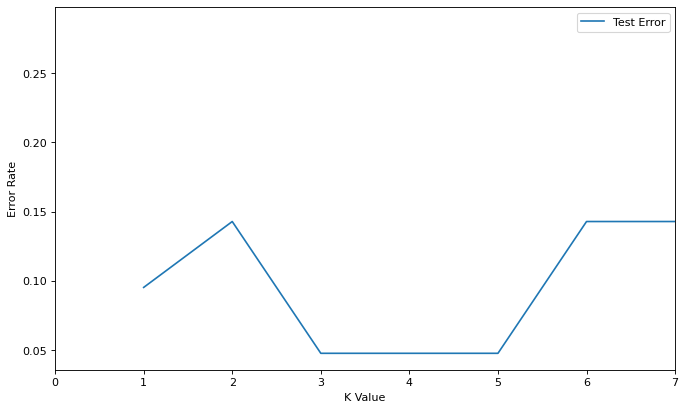

In [32]:
plt.figure(figsize=(10,6),dpi=80)
plt.plot(range(1,30),error,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xlim(0,7)

### Making Pipline 

In [14]:
scaler = StandardScaler()

In [15]:
Knn = KNeighborsClassifier()

In [16]:
op = [('scaler',scaler),('knn',knn)]

In [17]:
pipeline = Pipeline(op)

In [18]:
k_values = list(range(2,30))
#k_values

### Search For best Fitting model using Search Grid

In [19]:
param_grid = {'knn__n_neighbors':k_values}

In [20]:
grid_model = GridSearchCV(pipeline,param_grid=param_grid,cv=10,scoring='accuracy')

In [21]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [22]:
grid_model.best_params_

{'knn__n_neighbors': 3}

In [23]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Predicting Result and Checking Performance of model

In [24]:
y_predict = grid_model.predict(X_test)

In [25]:
confusion_matrix(y_predict,y_test)

array([[ 9,  0],
       [ 1, 11]], dtype=int64)

In [26]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           M       0.90      1.00      0.95         9
           R       1.00      0.92      0.96        12

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



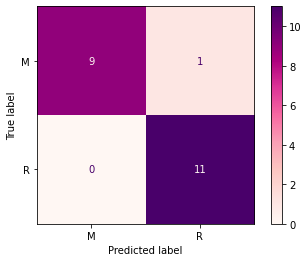

In [27]:
ConfusionMatrixDisplay.from_estimator(grid_model,X_test,y_test,cmap='RdPu');

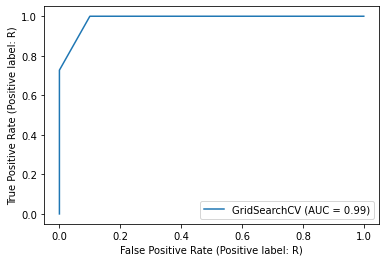

In [28]:
RocCurveDisplay.from_estimator(grid_model,X_test,y_test);

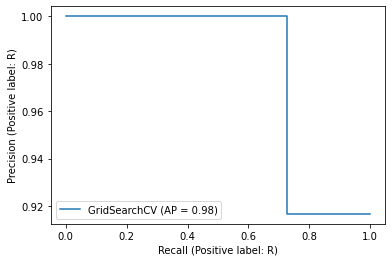

In [29]:
PrecisionRecallDisplay.from_estimator(grid_model,X_test,y_test);

-----------

### Just To ensure that k = 3 is giving Good Accuracy

In [30]:
pd.DataFrame(grid_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004000,0.004000,0.000000,0.000000,2,{'knn__n_neighbors': 2},0.789474,0.842105,0.789474,0.736842,0.789474,0.894737,0.736842,0.666667,0.833333,0.777778,0.785673,0.060323,2
1,0.003128,0.006257,0.004686,0.007159,3,{'knn__n_neighbors': 3},0.789474,0.894737,0.894737,0.789474,0.842105,0.842105,0.842105,0.777778,0.777778,0.833333,0.828363,0.041886,1
2,0.004686,0.007159,0.001562,0.004687,4,{'knn__n_neighbors': 4},0.789474,0.842105,0.789474,0.789474,0.842105,0.894737,0.736842,0.666667,0.722222,0.722222,0.779532,0.065215,4
3,0.004686,0.007158,0.003124,0.006249,5,{'knn__n_neighbors': 5},0.789474,0.789474,0.789474,0.789474,0.842105,0.684211,0.789474,0.777778,0.777778,0.777778,0.780702,0.036731,3
4,0.007811,0.007811,0.001562,0.004686,6,{'knn__n_neighbors': 6},0.736842,0.842105,0.684211,0.789474,0.842105,0.789474,0.736842,0.722222,0.777778,0.722222,0.764327,0.050020,6


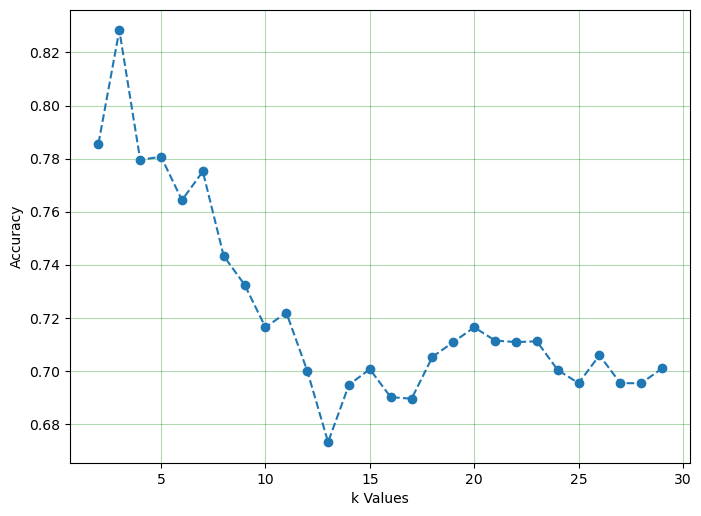

In [31]:
plt.figure(figsize=(8,6),dpi=100)
score =grid_model.cv_results_['mean_test_score']
#score
plt.plot(range(2,30),score,'--o')
plt.grid(alpha=0.3,color='green')
plt.xlabel("k Values")
plt.ylabel('Accuracy')
plt.show()

### Project Done!

-------